# Etape 1 - Preparation et Nettoyage des Donnees

Objectif: Preparer un dataset propre et fusionne a partir de plusieurs sources de donnees pour l'entrainement du modele de scoring credit.

## 1. Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Configuration d'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Definition des chemins
ROOT_DIR = Path('.').resolve().parent
DATA_DIR = ROOT_DIR / 'datasets'
OUTPUT_DIR = ROOT_DIR / 'outputs'

print(f"Root directory: {ROOT_DIR}")
print(f"Data directory: {DATA_DIR}")
print(f"Output directory: {OUTPUT_DIR}")

Root directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps
Data directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps\datasets
Output directory: C:\Users\daniel.guedj_arondor\Downloads\perso\openclassrooms\MLOps\outputs


## 2. Charger les donnees

In [2]:
print("Chargement des donnees...")

application_train = pd.read_csv(DATA_DIR / 'application_train.csv')
application_test = pd.read_csv(DATA_DIR / 'application_test.csv')
bureau = pd.read_csv(DATA_DIR / 'bureau.csv')
bureau_balance = pd.read_csv(DATA_DIR / 'bureau_balance.csv')
credit_card_balance = pd.read_csv(DATA_DIR / 'credit_card_balance.csv')
installments_payments = pd.read_csv(DATA_DIR / 'installments_payments.csv')
pos_cash_balance = pd.read_csv(DATA_DIR / 'POS_CASH_balance.csv')
previous_application = pd.read_csv(DATA_DIR / 'previous_application.csv')

print(f"Application train shape: {application_train.shape}")
print(f"Application test shape: {application_test.shape}")
print(f"Bureau shape: {bureau.shape}")
print(f"Bureau balance shape: {bureau_balance.shape}")
print(f"Credit card balance shape: {credit_card_balance.shape}")
print(f"Installments payments shape: {installments_payments.shape}")
print(f"POS cash balance shape: {pos_cash_balance.shape}")
print(f"Previous application shape: {previous_application.shape}")

Chargement des donnees...
Application train shape: (307511, 122)
Application test shape: (48744, 121)
Bureau shape: (1716428, 17)
Bureau balance shape: (27299925, 3)
Credit card balance shape: (3840312, 23)
Installments payments shape: (13605401, 8)
POS cash balance shape: (10001358, 8)
Previous application shape: (1670214, 37)


## 3. Exploration de la data principale

In [3]:
print("=== APPLICATION TRAIN ===")
print(f"Colonnes: {application_train.shape[1]}")
print(f"Lignes: {application_train.shape[0]}")
application_train.head()

=== APPLICATION TRAIN ===
Colonnes: 122
Lignes: 307511


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
print("\nInfo sur les donnees:")
application_train.info()


Info sur les donnees:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
print("\n=== VARIABLE CIBLE ===")
print(application_train['TARGET'].value_counts())
print(f"\nPourcentage:")
print(application_train['TARGET'].value_counts(normalize=True) * 100)


=== VARIABLE CIBLE ===
TARGET
0    282686
1     24825
Name: count, dtype: int64

Pourcentage:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


## 4. Analyser les valeurs manquantes

In [6]:
# Nombre de valeurs manquantes
missing_train = pd.DataFrame({
    'Column': application_train.columns,
    'Missing_Count': application_train.isnull().sum(),
    'Missing_Percentage': (application_train.isnull().sum() / len(application_train)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("=== VALEURS MANQUANTES ===")
print(missing_train[missing_train['Missing_Count'] > 0])

=== VALEURS MANQUANTES ===
                                                    Column  Missing_Count  \
COMMONAREA_AVG                              COMMONAREA_AVG         214865   
COMMONAREA_MODE                            COMMONAREA_MODE         214865   
COMMONAREA_MEDI                            COMMONAREA_MEDI         214865   
NONLIVINGAPARTMENTS_MEDI          NONLIVINGAPARTMENTS_MEDI         213514   
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE         213514   
NONLIVINGAPARTMENTS_AVG            NONLIVINGAPARTMENTS_AVG         213514   
FONDKAPREMONT_MODE                      FONDKAPREMONT_MODE         210295   
LIVINGAPARTMENTS_AVG                  LIVINGAPARTMENTS_AVG         210199   
LIVINGAPARTMENTS_MEDI                LIVINGAPARTMENTS_MEDI         210199   
LIVINGAPARTMENTS_MODE                LIVINGAPARTMENTS_MODE         210199   
FLOORSMIN_MODE                              FLOORSMIN_MODE         208642   
FLOORSMIN_AVG                                FLOO

## 5. Fusionner les donnees

In [7]:
train = application_train.copy()
test = application_test.copy()

print("=== FUSION DES DONNEES ===")

# Bureau balance aggregation
print("\n1. Traitement Bureau Balance...")
bureau_balance_agg = bureau_balance.groupby('SK_ID_BUREAU').agg({
    'MONTHS_BALANCE': ['min', 'max', 'mean'],
    'STATUS': 'max'
}).reset_index()
bureau_balance_agg.columns = ['SK_ID_BUREAU', 'bb_min_months', 'bb_max_months', 'bb_mean_months', 'bb_worst_status']

bureau = bureau.merge(bureau_balance_agg, on='SK_ID_BUREAU', how='left')
print(f"Bureau shape apres fusion: {bureau.shape}")

=== FUSION DES DONNEES ===

1. Traitement Bureau Balance...
Bureau shape apres fusion: (1716428, 21)


In [9]:
# Bureau aggregation par client
print("2. Agregation Bureau par client...")

# Avant agregation: convertir STATUS en numerique pour le max()
# Créer une mapping pour les status (X=worst, 5=best)
status_mapping = {'X': 5, 'C': 4, '3': 3, '2': 2, '1': 1, '0': 0}
bureau['bb_worst_status_numeric'] = bureau['bb_worst_status'].map(status_mapping).fillna(0).astype(int)

bureau_agg = bureau.groupby('SK_ID_CURR').agg({
    'SK_ID_BUREAU': 'count',
    'CREDIT_ACTIVE': lambda x: (x == 'Active').sum(),
    'AMT_CREDIT_SUM': ['sum', 'mean'],
    'AMT_CREDIT_SUM_DEBT': ['sum', 'mean'],
    'DAYS_CREDIT': 'mean',
    'bb_worst_status_numeric': 'max'
}).reset_index()
bureau_agg.columns = ['SK_ID_CURR', 'bureau_count', 'bureau_active_count', 'bureau_credit_sum', 'bureau_credit_mean', 'bureau_debt_sum', 'bureau_debt_mean', 'bureau_days_credit_mean', 'bureau_worst_status']
print(f"Shape: {bureau_agg.shape}")

2. Agregation Bureau par client...
Shape: (305811, 9)


In [11]:
# Credit Card Balance - Verifier les colonnes d'abord
print("3. Agregation Credit Card Balance...")
print(f"Colonnes disponibles: {list(credit_card_balance.columns)}")

credit_card_agg = credit_card_balance.groupby('SK_ID_CURR').agg({
    'AMT_BALANCE': ['sum', 'mean', 'max'],
    'AMT_CREDIT_LIMIT_ACTUAL': ['sum', 'mean'],
    'MONTHS_BALANCE': 'count'
}).reset_index()
credit_card_agg.columns = ['SK_ID_CURR', 'credit_card_balance_sum', 'credit_card_balance_mean', 'credit_card_balance_max', 'credit_card_limit_sum', 'credit_card_limit_mean', 'credit_card_count']
print(f"Shape: {credit_card_agg.shape}")

3. Agregation Credit Card Balance...
Colonnes disponibles: ['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF']
Shape: (103558, 7)


In [12]:
# Installments Payments
print("4. Agregation Installments Payments...")
installments_agg = installments_payments.groupby('SK_ID_CURR').agg({
    'NUM_INSTALMENT_NUMBER': 'count',
    'AMT_INSTALMENT': ['sum', 'mean'],
    'AMT_PAYMENT': ['sum', 'mean'],
    'DAYS_ENTRY_PAYMENT': 'mean'
}).reset_index()
installments_agg.columns = ['SK_ID_CURR', 'installments_count', 'installments_sum', 'installments_mean', 'payment_sum', 'payment_mean', 'payment_days_mean']
print(f"Shape: {installments_agg.shape}")

4. Agregation Installments Payments...
Shape: (339587, 7)


In [13]:
# POS Cash Balance
print("5. Agregation POS Cash Balance...")
pos_agg = pos_cash_balance.groupby('SK_ID_CURR').agg({
    'MONTHS_BALANCE': 'count',
    'CNT_INSTALMENT': 'sum',
    'CNT_INSTALMENT_FUTURE': 'sum'
}).reset_index()
pos_agg.columns = ['SK_ID_CURR', 'pos_count', 'pos_installment_sum', 'pos_future_installment']
print(f"Shape: {pos_agg.shape}")

5. Agregation POS Cash Balance...
Shape: (337252, 4)


In [15]:
# Previous Application - Verifier les colonnes disponibles
print("6. Agregation Previous Application...")
print(f"Colonnes disponibles: {list(previous_application.columns)}")

previous_app_agg = previous_application.groupby('SK_ID_CURR').agg({
    'SK_ID_PREV': 'count',
    'AMT_APPLICATION': 'mean',
    'AMT_CREDIT': 'mean'
}).reset_index()
previous_app_agg.columns = ['SK_ID_CURR', 'previous_app_count', 'previous_app_amount_mean', 'previous_credit_mean']
print(f"Shape: {previous_app_agg.shape}")

6. Agregation Previous Application...
Colonnes disponibles: ['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']
Shape: (338857, 4)


In [16]:
# Fusionner toutes les aggregations
print("\n=== FUSION DES AGREGATIONS ===")
train = train.merge(bureau_agg, on='SK_ID_CURR', how='left')
print(f"Apres bureau_agg: {train.shape}")

train = train.merge(credit_card_agg, on='SK_ID_CURR', how='left')
print(f"Apres credit_card_agg: {train.shape}")

train = train.merge(installments_agg, on='SK_ID_CURR', how='left')
print(f"Apres installments_agg: {train.shape}")

train = train.merge(pos_agg, on='SK_ID_CURR', how='left')
print(f"Apres pos_agg: {train.shape}")

train = train.merge(previous_app_agg, on='SK_ID_CURR', how='left')
print(f"Apres previous_app_agg: {train.shape}")

print(f"\nFusion terminee! Shape final: {train.shape}")


=== FUSION DES AGREGATIONS ===
Apres bureau_agg: (307511, 130)
Apres credit_card_agg: (307511, 136)
Apres installments_agg: (307511, 142)
Apres pos_agg: (307511, 145)
Apres previous_app_agg: (307511, 148)

Fusion terminee! Shape final: (307511, 148)


## 6. Gerer les valeurs manquantes

In [17]:
# Verifier les valeurs manquantes apres fusion
missing_after = pd.DataFrame({
    'Column': train.columns,
    'Missing_Count': train.isnull().sum(),
    'Missing_Percentage': (train.isnull().sum() / len(train)) * 100
}).sort_values('Missing_Percentage', ascending=False)

print("=== VALEURS MANQUANTES APRES FUSION ===")
print(missing_after[missing_after['Missing_Count'] > 0])

=== VALEURS MANQUANTES APRES FUSION ===
                                                    Column  Missing_Count  \
credit_card_balance_sum            credit_card_balance_sum         220606   
credit_card_balance_mean          credit_card_balance_mean         220606   
credit_card_limit_mean              credit_card_limit_mean         220606   
credit_card_count                        credit_card_count         220606   
credit_card_balance_max            credit_card_balance_max         220606   
credit_card_limit_sum                credit_card_limit_sum         220606   
COMMONAREA_MODE                            COMMONAREA_MODE         214865   
COMMONAREA_AVG                              COMMONAREA_AVG         214865   
COMMONAREA_MEDI                            COMMONAREA_MEDI         214865   
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE         213514   
NONLIVINGAPARTMENTS_MEDI          NONLIVINGAPARTMENTS_MEDI         213514   
NONLIVINGAPARTMENTS_AVG            N

In [18]:
# Imputation
print("\n=== IMPUTATION ===")

# Colonnes numeriques: remplir avec la mediane
numeric_cols = train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if train[col].isnull().sum() > 0:
        median_val = train[col].median()
        train[col].fillna(median_val, inplace=True)
        if col in test.columns:
            test[col].fillna(median_val, inplace=True)

# Colonnes categoriques: remplir avec le mode
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0] if not train[col].mode().empty else 'Unknown'
        train[col].fillna(mode_val, inplace=True)
        if col in test.columns:
            test[col].fillna(mode_val, inplace=True)

print(f"Imputation terminee")
print(f"Valeurs manquantes restantes: {train.isnull().sum().sum()}")


=== IMPUTATION ===
Imputation terminee
Valeurs manquantes restantes: 0


## 7. Encoder les variables categoriques

In [19]:
from sklearn.preprocessing import LabelEncoder

print("=== ENCODAGE ===")

categorical_cols = train.select_dtypes(include=['object']).columns
print(f"Colonnes a encoder: {len(list(categorical_cols))}")

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))
    
    if col in test.columns:
        test[col] = le.transform(test[col].astype(str))
    
    label_encoders[col] = le

print(f"Encodage termine")

=== ENCODAGE ===
Colonnes a encoder: 16
Encodage termine


## 8. Export des donnees

In [20]:
print("\n=== DONNEES FINALES ===")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
print(f"\nValeurs manquantes en train: {train.isnull().sum().sum()}")
print(f"Valeurs manquantes en test: {test.isnull().sum().sum()}")


=== DONNEES FINALES ===
Train shape: (307511, 148)
Test shape: (48744, 121)

Valeurs manquantes en train: 0
Valeurs manquantes en test: 0


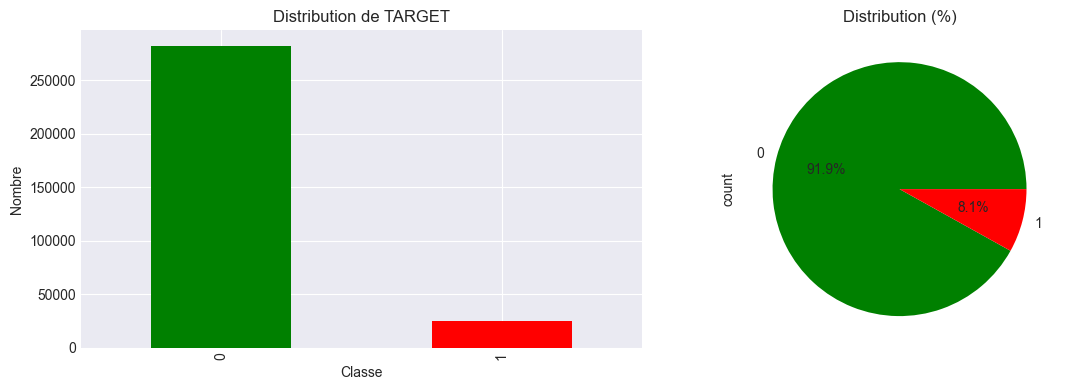


Dessequilibre de classe:
Classe 0 (Bon): 282686
Classe 1 (Mauvais): 24825


In [21]:
# Distribution de la cible
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

train['TARGET'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Distribution de TARGET')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Nombre')

train['TARGET'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'red'])
axes[1].set_title('Distribution (%)')

plt.tight_layout()
plt.show()

print(f"\nDessequilibre de classe:")
print(f"Classe 0 (Bon): {(train['TARGET'] == 0).sum()}")
print(f"Classe 1 (Mauvais): {(train['TARGET'] == 1).sum()}")

In [22]:
# Export
print("\n=== EXPORT ===")
train.to_csv(OUTPUT_DIR / 'train_processed.csv', index=False)
test.to_csv(OUTPUT_DIR / 'test_processed.csv', index=False)

print(f"train_processed.csv sauvegarde ({train.shape})")
print(f"test_processed.csv sauvegarde ({test.shape})")


=== EXPORT ===
train_processed.csv sauvegarde ((307511, 148))
test_processed.csv sauvegarde ((48744, 121))
